In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [18]:
sup = pd.read_csv("../Multi linear regression/50_Startups.csv")
print(sup.shape)
sup.head()

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
sup.rename(columns = {'R&D Spend':'RD_Spend'}, inplace = True)
sup.rename(columns = {'Marketing Spend':'Marketing_Spend'}, inplace = True)
sup.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RD_Spend           50 non-null float64
Administration     50 non-null float64
Marketing_Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
print(sup.isnull().sum())      #checking for null value

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64


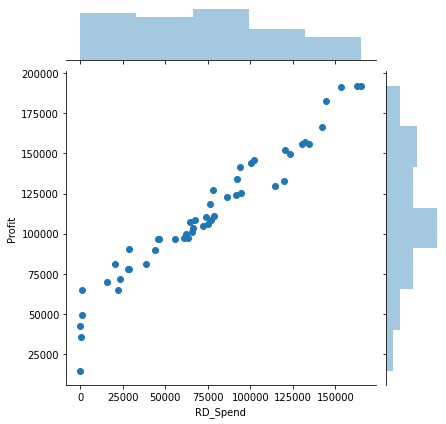

In [21]:
import seaborn as sns
sns.jointplot(data = sup, x = 'RD_Spend', y='Profit')
plt.show()

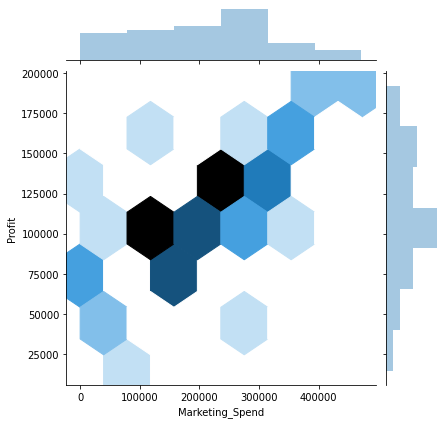

In [22]:
sns.jointplot(x = 'Marketing_Spend', y='Profit', kind='hex',data=sup)
plt.show()

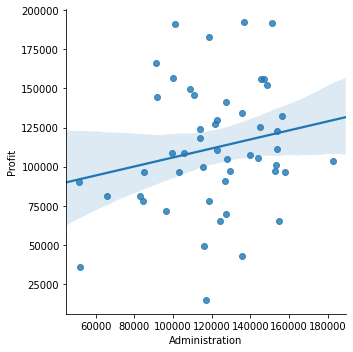

In [6]:
sns.lmplot(x = 'Administration', y='Profit',data=sup)
plt.show()

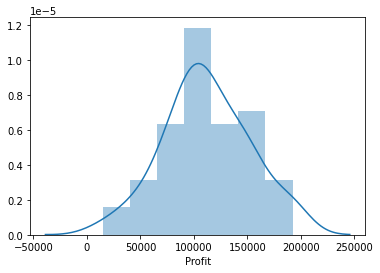

In [23]:
sns.distplot(sup['Profit'])
plt.show()

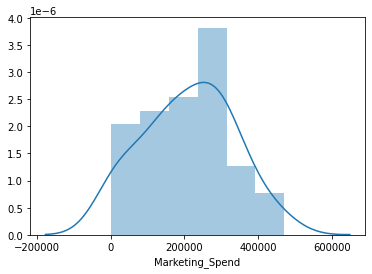

In [24]:
sns.distplot(sup['Marketing_Spend'])
plt.show()

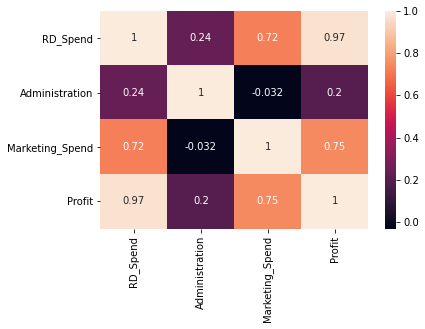

In [25]:
sns.heatmap(sup.corr(),annot=True)
plt.show()

In [10]:
sup.corr()

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [26]:
sup_dummies = pd.get_dummies(sup,columns=['State'])
sup_dummies.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [27]:
import statsmodels.formula.api as smf
ml1 = smf.ols('Profit ~ RD_Spend+Administration+Marketing_Spend+State', data=sup).fit()  # regression model
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.34e-27
Time:                        19:24:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD_Spend              0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
ml1_pred = ml1.predict(sup)
ml1_error = ml1_pred-sup.Profit
print(np.sqrt(np.mean(ml1_error*ml1_error)),"RMSE value of ML1")

8854.761029414496 RMSE value of ML1


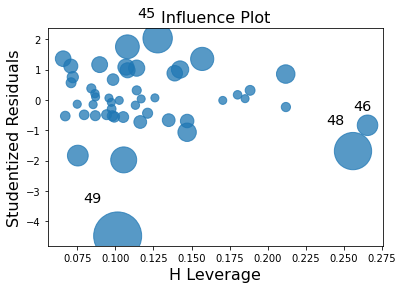

In [29]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
plt.show()

In [30]:
sup_new=sup.drop(sup.index[[48,49]],axis=0)

In [31]:
# preparing model
ml_new = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State', data=sup_new).fit()
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           7.02e-29
Time:                        19:24:45   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.939e+04   6093.634      9.746      0.000    4.71e+04    7.17e+04
State[T.Florida]  -1150.1897   2712.520     -0.424      0.674   -6624.276    4323.896
State[T.New York]  -665.7875   2678.779     -0.249      0.805   -6071.783    4740.208
RD_Spend              0.7888      0.037     21.160      0.000       0.714       0.864
Administration       -0.0621      0.045     -1.381      0.174      -0.153       0.029
Marketing_Spend       0.0179      0.014      1.275      0.209      -0.010       0.046
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
mlnew_pred = ml_new.predict(sup_new)
mlnew_rmse = mlnew_pred-sup_new.Profit
print(np.sqrt(np.mean(mlnew_rmse*mlnew_rmse)),"RMSE value of MLnew")

7021.3398122760545 RMSE value of MLnew


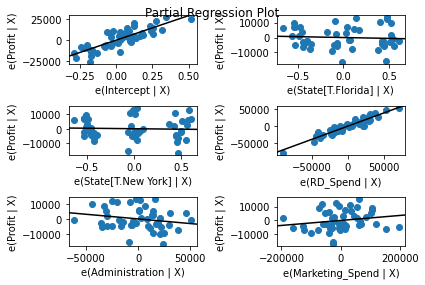

In [35]:
# Added varible plot 
sm.graphics.plot_partregress_grid(ml_new)
plt.show()

In [36]:
final_ml= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data = sup_new).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           2.03e-31
Time:                        19:25:16   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD_Spend            0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
final_pred = final_ml.predict(sup_new)
error = final_pred-sup_new.Profit
print(np.sqrt(np.mean(error*error)),"RMSE value after dropping State")   # 7036.4848

7036.4848100048 RMSE value after dropping State


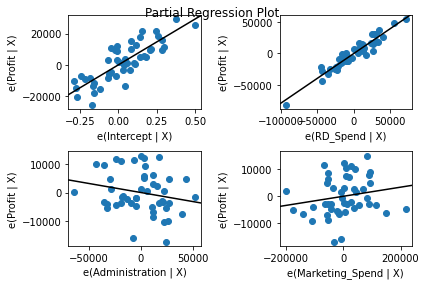

In [38]:
# Added varible plot 
sm.graphics.plot_partregress_grid(final_ml)
plt.show()

In [39]:
final_ml1= smf.ols('Profit~RD_Spend+Administration',data = sup_new).fit()
final_ml1.params

Intercept         62734.700114
RD_Spend              0.822911
Administration       -0.083726
dtype: float64

In [40]:
final_ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.62e-32
Time:                        19:25:38   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
RD_Spend           0.8229      0.025     33.245      0.000       0.773       0.873
Administration    -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
final_pred1 = final_ml1.predict(sup_new)
error = final_pred1-sup_new.Profit
print(np.sqrt(np.mean(error*error)),"RMSE value after dropping Marketing_Spend")

7160.04961495039 RMSE value after dropping Marketing_Spend


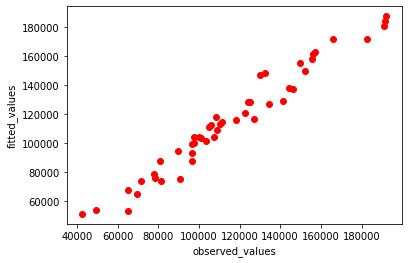

In [42]:
# Observed values VS Fitted values
plt.scatter(sup_new.Profit,final_pred1,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")
plt.show()

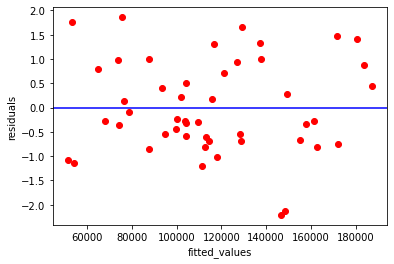

In [43]:
# Residuals VS Fitted Values 
plt.scatter(final_pred1,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")
plt.show()

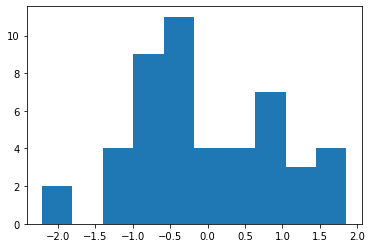

In [28]:
# histogram
plt.hist(final_ml.resid_pearson) # Checking the standardized residuals are normally distributed
plt.show()

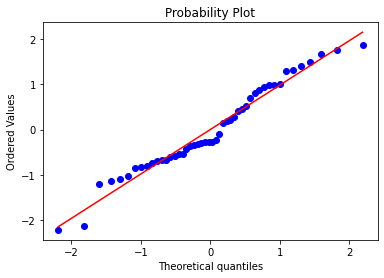

In [44]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st

# Checking Residuals are normally distributed
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)
plt.show()

In [45]:
# Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
sup_train,sup_test  = train_test_split(sup_new,test_size = 0.2) # 20% size

In [46]:
# preparing the model on train data 

model_train = smf.ols("Profit~RD_Spend+Administration",data=sup_train).fit()

# train_data prediction
train_pred = model_train.predict(sup_train)

# train residual values 
train_resid  = train_pred - sup_train.Profit

# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

6506.4476745717275

In [47]:
# prediction on test data set 
test_pred = model_train.predict(sup_test)

# test residual values 
test_resid  = test_pred - sup_test.Profit

# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

9760.245023139494

In [34]:
test_pred.corr(sup.Profit)

0.9891101401819048

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV

In [56]:

alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(train_pred, train_resid) 
    pred_test_lasso= model_lasso.predict(X_test)
    new_score = test_rmse(test_pred, pred_test_lasso)
    new_mse = mean_squared_error(test_pred, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha(alpha)

ValueError: Expected 2D array, got 1D array instead:
array=[ 76201.02141062 174083.81084128 112223.35393433  73513.09247909
  77956.01476232 129858.64588605  64334.84177218 130051.85818619
  50615.71031685 105063.3455851  104870.2004807   99978.27939757
 139057.06040166 116761.66759685 160195.28887621  67970.34912822
 109973.38583162 164888.63183552  88288.99861747 130683.90239706
 104758.77186861 113756.0327418   75499.48365063 174169.03539878
  93274.14788363 118501.64092295 114194.14176664 104558.21935802
  94107.25822325 138727.26129994 187113.47985674 190506.30218617
 115639.77089104  72845.24332173 128499.22919066 117683.60803666
 157005.36881979 183049.33484607].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.